# Metropolis Algorithm

To find the expectancy of a function on a random variable can be determined with by the following expression.

$\langle x^2 \rangle  = \frac{\int_0^{\infty} x^2 \cdot e^{-x}dx}{\int_0^{\infty} e^{-x}dx}$


In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def metro_polis(X_i , delta, p):
    X_t = X_i + np.random.uniform(-delta, delta)
    w = p(X_t) / p(X_i)
    if w >= 1:
        return X_t
    else:
        r = np.random.uniform(0, 1)
        if r <= w:
            return X_t
        else:
            return X_i

def p(x):
    if x < 0:
        return 0
    else:
        return np.exp(-x)


def sample(n,delta,p):
    X_i = 2
    for i in range(500):
        X_i = metro_polis(X_i, delta, p)

    X_sample = []
    for i in range(n):
        X_i = metro_polis(X_i, delta, p)
        X_sample.append(X_i)

    return X_sample

We can sample x values from the distribution now using the metropolis algorithm. 
We will plot them in a histogram:

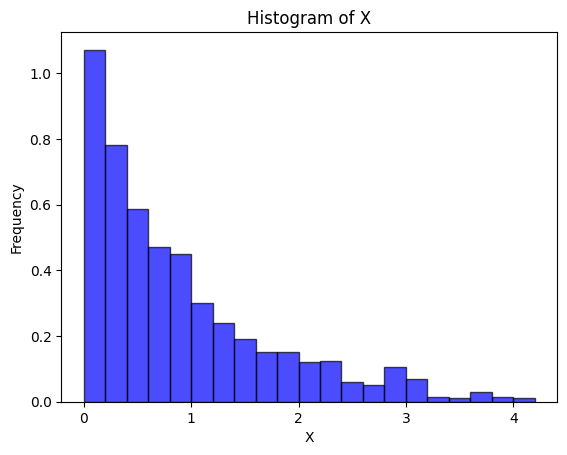

In [30]:
X_sample = sample(1000, 1, p)
bins = np.arange(0, max(X_sample), 0.2)
plt.hist(X_sample, bins=bins, density=True,
         color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram of X")
plt.xlabel("X")
plt.ylabel("Frequency")
plt.show()

We can see that the sampling of the values is not uniform. The closer to 0 we get the higher the sampling rate.
This is to be expected since the sampling should follow the distribution.
By squaring all sampled x-values and taking the mean of the squares, we can estimate the expectaiton of x^2.

In [31]:
X_sq = [x**2 for x in X_sample]

expect = np.mean(X_sq)
print("The expectation of X^2 is: ", expect)

The expectation of X^2 is:  1.5280482292478845


We can compute the above integral analytically as follows:

The denominator is obviously:
$$\int_0^{\infty} e^{-x}dx = 1$$

The numerator can be integrated using integration by parts:

$$\int_0^{\infty} x^2 \cdot e^{-x}dx =  -x^2e^{-x}\Big|_0^\infty + 2\int_0^{\infty} x \cdot e^{-x}dx = -x^2e^{-x}\Big|_0^\infty + 2(-xe^{-x}\Big|_0^\infty  + \int_0^{\infty} e^{-x}dx )$$

$$\int_0^{\infty} x^2 \cdot e^{-x}dx = 0 + 2(0 + 1) = 2$$

For the sample size of 1000 the estimation of the expected value is not very accurate.
In the following we will try different values of n and delta.

In [37]:
def samp_expect(n,delta,p):
    X_sample = sample(n,delta,p)
    X_sq = [x**2 for x in X_sample]
    return np.mean(X_sq)

del_vals = [0.1,1,10]
for delta in del_vals:
    expect = samp_expect(250, delta, p)
    print("n = {:<4}, delta = {:<3} The expectation of X^2 is: {:4f}".format(250,delta,  expect))
    expect = samp_expect(2500,delta,p)
    print("n = {:<4}, delta = {:<3} The expectation of X^2 is: {:4f}".format(2500,delta,  expect))


n = 250 , delta = 0.1 The expectation of X^2 is: 0.848989
n = 2500, delta = 0.1 The expectation of X^2 is: 0.241045
n = 250 , delta = 1   The expectation of X^2 is: 4.447547
n = 2500, delta = 1   The expectation of X^2 is: 1.461757
n = 250 , delta = 10  The expectation of X^2 is: 1.587603
n = 2500, delta = 10  The expectation of X^2 is: 2.271173


However if we use delta = 1 and run 1000000 iterations the simulation converges and the prediction is much closer to the analytical value.

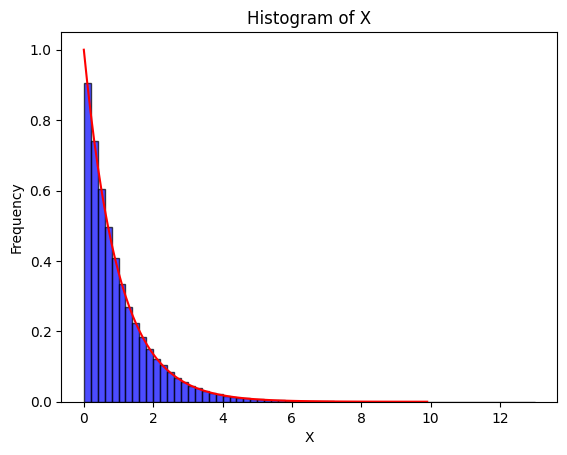

In [40]:
X_sample = sample(1000000, 1, p)
bins = np.arange(0, max(X_sample), 0.2)

x = np.arange(0, 10, 0.1)
y = np.exp(-x)
plt.plot(x, y, color='red', label='Expected Distribution')

plt.hist(X_sample, bins=bins, density=True,
         color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram of X")
plt.xlabel("X")
plt.ylabel("Frequency")
plt.show()

If we compare the obtained values with the actual funciton we want to sample we can see that our model is quite accurate.

In [39]:
X_sq = [x**2 for x in X_sample]

exp_sq= np.mean(X_sq)
print("The expectation of X^2 is: ", exp_sq)

The expectation of X^2 is:  1.9525249367537516


We can also compute the variance and through it the standard deviation.

$$(\Delta X)^2 = \sqrt{\langle X^2 \rangle -{\langle X \rangle}^2}$$

In [35]:
exp = np.mean(X_sample)
var = np.sqrt(exp_sq - exp**2)
print("The estimate of the variance of the distribuiton is:", var)
print("The estimate of the standard deviation is:",np.sqrt(var))

The estimate of the variance of the distribuiton is: 0.9981467521991301
The estimate of the standard deviation is: 0.9990729463853628


The values we sample are correlated over a short time. This means that we can predict what value will be sampled next if we know the last sampled value.
However if we sample a lot of points and do not look at them we cannot make any meaningful prediction for the next value based on the first one.

To check how fast the correlation decays we can calculate the following expression:

$$C(j) =  \frac{\langle x_{i+j}x_i \rangle - {\langle x_i \rangle}^2}{\langle x_i^2 \rangle - {\langle x_i \rangle}^2}$$

By going over multiple j values we can investigate the 

The best fit function is: a * exp(-b * x) + c
a = 0.9348214476505261, b = 0.07709619592734226, c = 0.018509495774031832


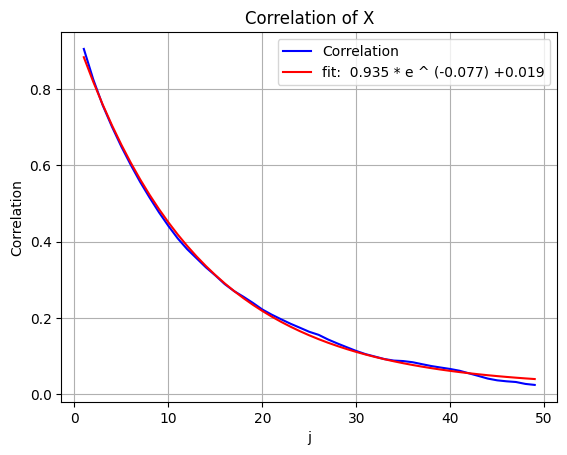

In [54]:
from scipy.optimize import curve_fit
n_i = 10000
n_j = 50
samp_cor = sample(n_i + n_j, 1, p)
samp_cor = np.asarray(samp_cor)
samp_sq_corr = [i**2 for i in samp_cor]

exp_sq_cor = np.mean(samp_sq_corr)
exp_cor = np.mean(samp_cor)

j_vals = range(1, n_j)
x_ij_sum = np.zeros(n_j)

x_ij_sum[0] = exp_sq_cor
for j in j_vals:
    x_ij_sum[j] = np.mean(samp_cor[j:] * samp_cor[:-j])
    # for i in range(n_i):
    #    x_ij_sum[j] += samp_cor[i] *samp_cor[i+j]

x_ij_exp = x_ij_sum

corr = [(x_ij_exp[i] - exp_cor**2)/(exp_sq_cor - exp_cor**2)
        for i in range(1, n_j)]

plt.plot(j_vals, corr, 'b-', label='Correlation')
plt.title("Correlation of X")
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("j")
plt.ylabel("Correlation")
plt.grid()

# find best fit fucntion of correlation wrt j


def func(x, a, b, c):
    return a * np.exp(-b * x) + c


popt, pcov = curve_fit(func, j_vals, corr)

plt.plot(j_vals, func(j_vals, *popt), 'r-', label='fit:  %5.3f * e ^ (-%5.3f) +%5.3f' % tuple(popt))
plt.legend()
print("The best fit function is: a * exp(-b * x) + c")
print("a = {:<4}, b = {:<3}, c = {:<3}".format(popt[0], popt[1], popt[2]))


The autocorrelation seems to decay exponentionally. And after about 50 samples there is almost no visible correlation  between the values. To sample uncorrelated values you could either take values that are this far apart or just sample many values. Generally it seems to vanish after about $50\delta$ samples.

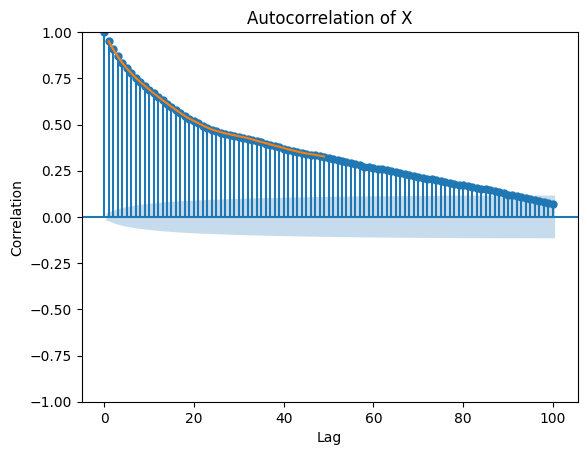

In [48]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(samp_cor, lags=100)
plt.title("Autocorrelation of X")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

The computed autocorrelation agrees with the premade funciton.